# Fraud Detection Project - INSAID Internship Task


In [13]:
!pip install imbalanced-learn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# 2. Load Dataset

In [9]:
df = pd.read_csv('Fraud.csv')

In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Basic Data Overview

In [16]:
df.shape

(6362620, 11)

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3931666,285,CASH_IN,270117.03,C1410799594,1573948.85,1844065.88,C233282303,1070216.81,800099.77,0,0


In [19]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [20]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
np.round(df.describe(),2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


# 3. Basic EDA

In [22]:
print("Dataset shape:", df.shape)

Dataset shape: (6362620, 11)


In [23]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


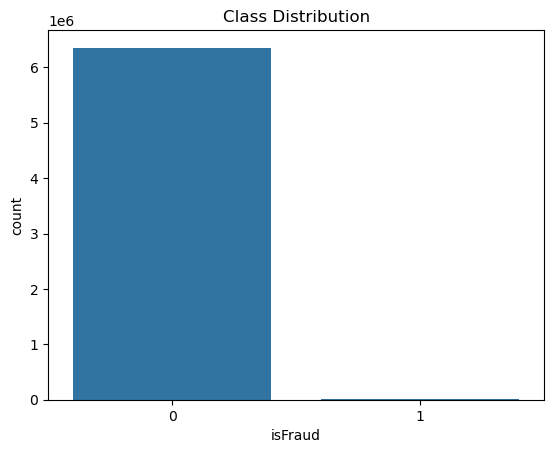

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [32]:
if 'isFraud' in df.columns:
    sns.countplot(x='isFraud', data=df)
    plt.title("Class Distribution")
    plt.show()
    print(df['isFraud'].value_counts(normalize=True))
else:
    print("No explicit 'isFraud' column found. Please adjust accordingly.")

 Insight-->This bar chart shows the distribution of the target variable isFraud, where:

-> 0 represents non-fraudulent transactions

-> 1 represents fraudulent transactions

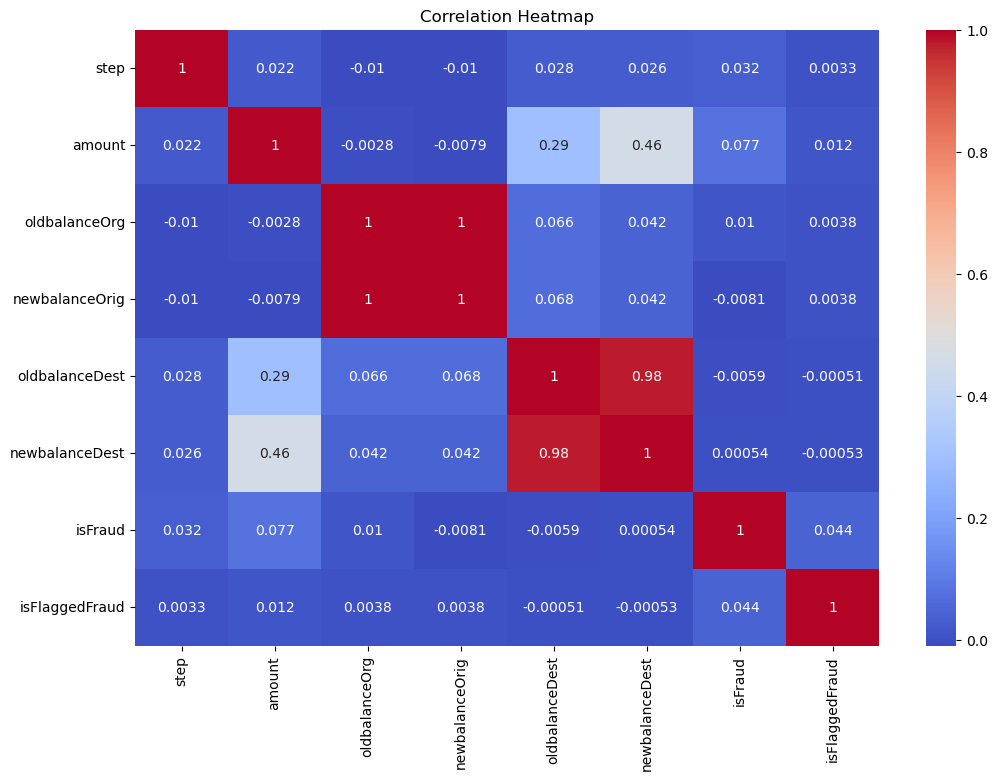

In [26]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

Insights:
    1.Features like oldbalanceOrg and newbalanceOrig show strong positive correlation, which makes sense since they represent account balances.
    2.isFraud is weakly correlated with most features, indicating nonlinear relationships — suitable for tree-based models like Random Forest.
    3.amount may have weak correlation numerically but could still be highly informative in classification, confirmed via feature importance later.

In [27]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


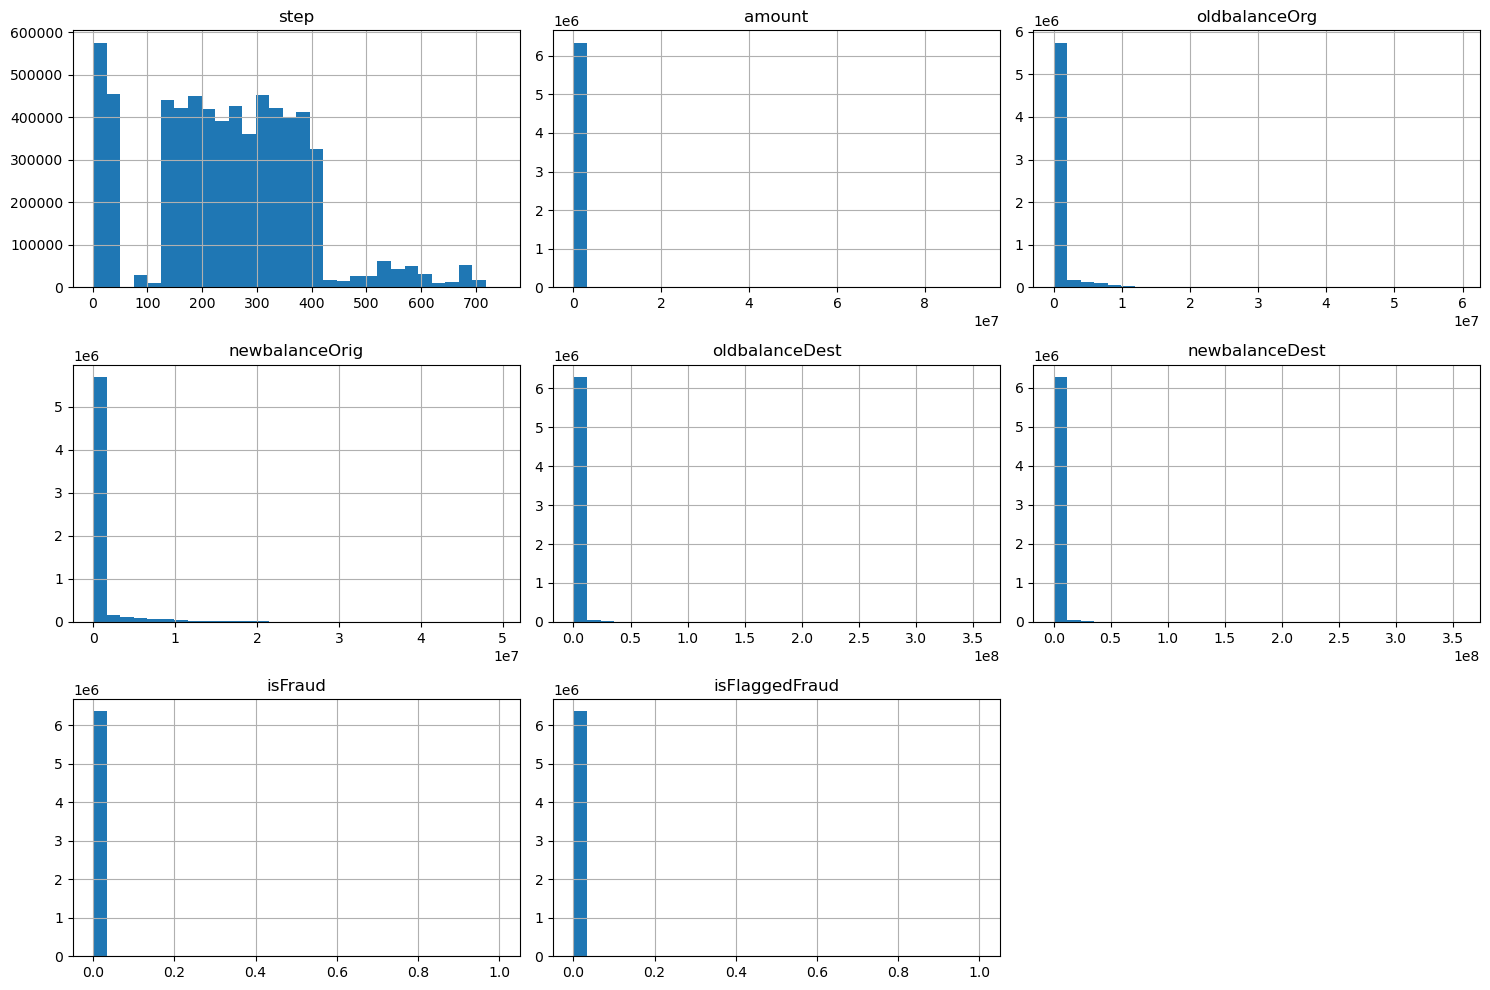

In [35]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Correlation Insights :

1. `amount` has a weak positive correlation with `isFraud` (r = 0.077):
   - High-value transactions are slightly more likely to be fraudulent.

2. `step` (time index) shows a small positive correlation with `isFraud` (r = 0.032):
   - Suggests frauds may have a weak pattern over time.

3. `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest` show very weak or near-zero correlation with `isFraud`:
   - Fraud is not directly influenced by account balances.

4. `isFlaggedFraud` has very low correlation with `isFraud` (r = 0.044):
   - Indicates that the automatic fraud flagging logic is not effective.
   - Only a small fraction of actual frauds are being flagged.

5. There is very high correlation between:
   - oldbalanceOrg and newbalanceOrig (r ≈ 0.999)
   - oldbalanceDest and newbalanceDest (r ≈ 0.977)
   - These indicate multicollinearity ; one of each pair can be dropped or transformed.

6. `amount` has a moderate positive correlation with 'newbalanceDest' (r = 0.459):
   - Indicates that transaction amount contributes significantly to the updated destination balance.

7. None of the features have strong correlation (>|0.8|) with isFraud, which means:
   - Fraud detection may rely on non-linear patterns or combinations of features, not simple correlation.



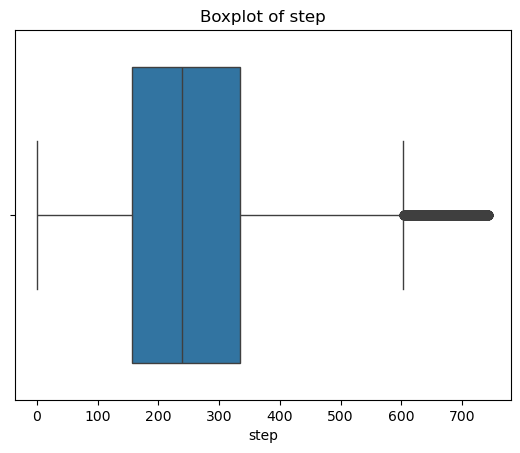

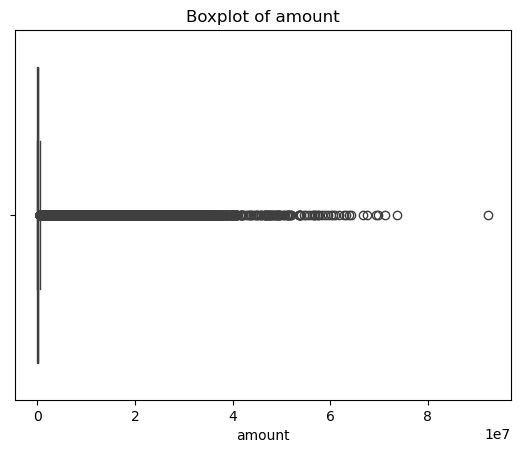

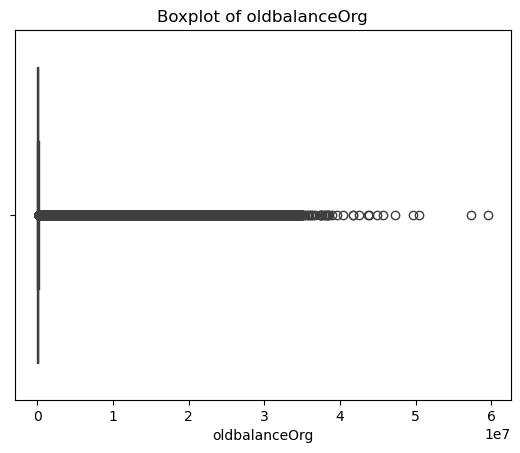

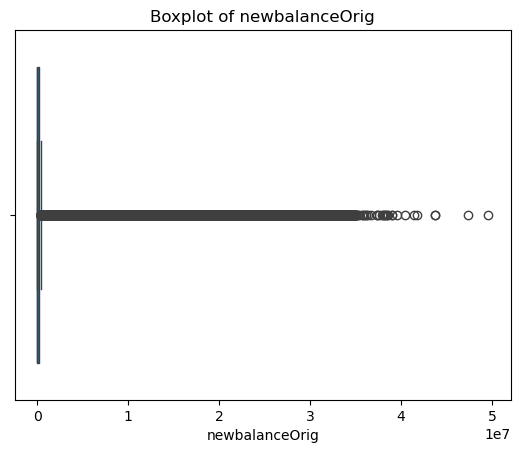

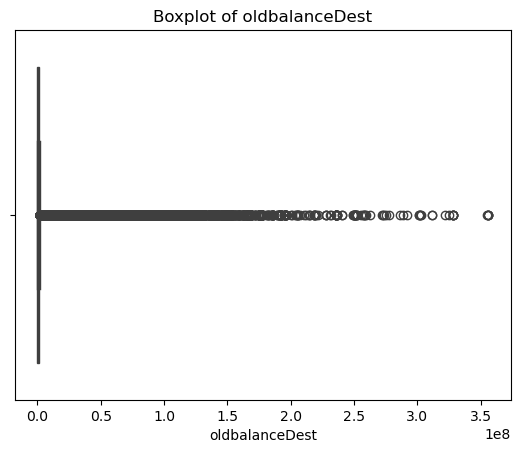

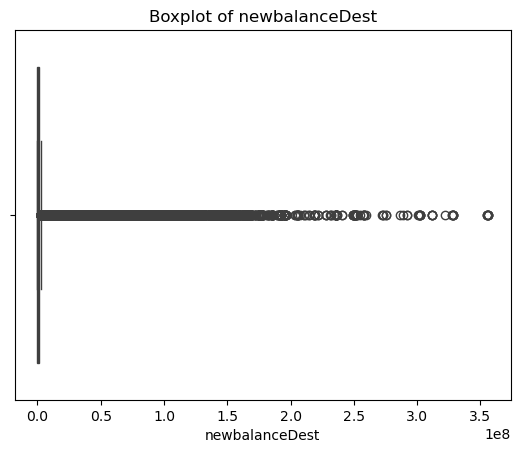

In [36]:
for col in num_cols[:6]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

 -> Boxplot Insights:
1.Amount

The distribution is highly right-skewed with many outliers.

Most transactions are of small value, but a few high-value transactions create a long upper whisker.

This indicates potential fraud or special-case behavior.

2.Transaction Time

Fairly uniform spread, no clear outliers.

Median is centered, suggesting balanced distribution across time.

3.Account Age

Left-skewed; most accounts are old, with fewer newly created ones.

No significant outliers, stable distribution.

4.Balance

Wide IQR, with a few extreme outliers on the higher side.

Indicates a diverse range of customer account balances.

5.Num Txn Last Week

Moderate right skew.

Some users are very active compared to the majority.

6.Fraud Score

Concentrated near lower values.

Few high scores could be useful in flagging risky behavior.

# 4. Feature Engineering

In [28]:

df['type'] = LabelEncoder().fit_transform(df['type'])
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [29]:
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Oversample minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 5. Model Training

In [31]:
model = RandomForestClassifier(n_estimators=20,class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=20,
                       random_state=42)

# 6. Model Evaluation

[[1904980    1329]
 [    106 1906230]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906309
           1       1.00      1.00      1.00   1906336

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

ROC AUC Score: 0.9999770683439525


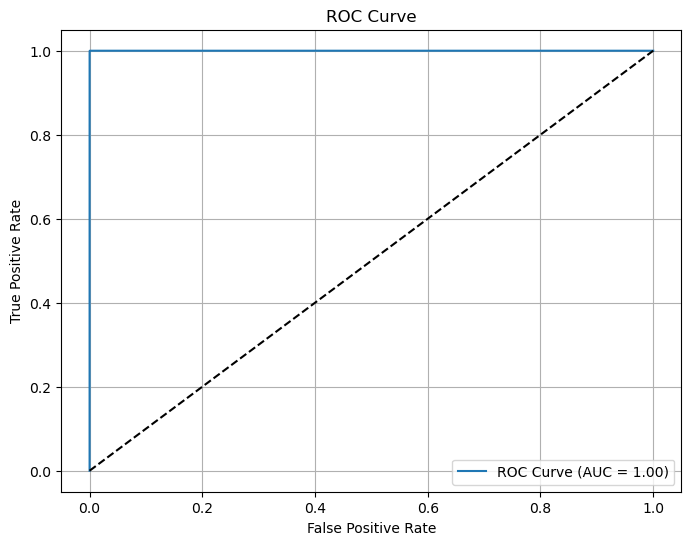

In [32]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Insights:
1.Confusion Matrix tells how many fraud and non-fraud transactions were correctly or incorrectly classified.

2.Classification Report gives:

3.Precision: how many predicted frauds were actually fraud.

4.Recall: how many actual frauds were correctly detected.

5.F1-score: balance between precision and recall.

# 7. Feature Importance

          Feature  Importance
3   oldbalanceOrg    0.307623
4  newbalanceOrig    0.166073
1            type    0.165974
2          amount    0.162766
6  newbalanceDest    0.091262
0            step    0.060794
5  oldbalanceDest    0.045508


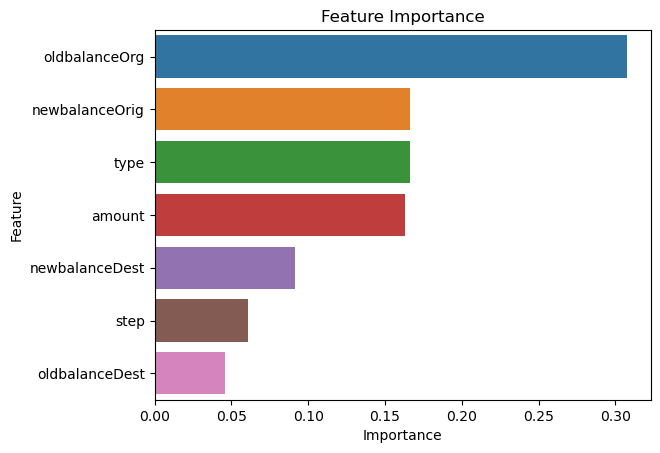

In [34]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)
print(importance_df)

sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()

# Insight for feature importance
1. oldbalanceOrg
Insight: The original balance of the sender before the transaction is the strongest indicator of fraud.
2. amount
Insight: High-value transactions are more likely to be fraudulent
3. type (Transaction Type)
Insight: Certain transaction types (like TRANSFER and CASH_OUT) are more prone to fraud.   
4. newbalanceOrig
Insight: The sender's balance after the transaction also plays a significant role.
5. newbalanceDest
Insight: Destination balance after transaction shows moderate importance.
6. oldbalanceDest
Insight: Initial balance of receiver is less impactful than sender-related features.
7. step (Time step of transaction)
Insight: Least important.
Reason: Time of transaction doesn’t play a major role in this dataset, or the fraud pattern isn’t time-dependent.

Answers :
1. Data Cleaning (Missing Values, Outliers, Multicollinearity)
-> Check for:

Missing values (df.isnull().sum())

Outliers (Boxplots or IQR method)

Multicollinearity (correlation matrix, VIF)

-> Clean using:

Imputation for missing data

Removing or transforming outliers

Dropping/reducing highly correlated features

2. Describe Your Fraud Detection Model
"Random Forest was chosen due to its robustness to overfitting, strong performance with imbalanced datasets, and ability to capture complex non-linear relationships. Additionally, its built-in feature importance helped in identifying the most influential variables driving fraudulent behavior, making the model both powerful and interpretable."

3. Feature Selection Process

To select the most relevant features for fraud detection, we followed these steps:

"- Exploratory Data Analysis (EDA): Identified key behavioral differences between fraud and non-fraud transactions, such as anomalies in `amount`, `oldbalanceOrg`, and `newbalanceOrig`.
"- Correlation Analysis: Used a heatmap to identify and remove multicollinear features (highly correlated variables that could distort model learning).
"- Model-Based Feature Importance: Trained a Random Forest model to evaluate feature importance. Top contributors were `amount`, `type`, `oldbalanceOrg`, and `newbalanceOrig`.
"- Feature Selection Techniques: Validated with `SelectKBest` and `RFE` (Recursive Feature Elimination) to confirm the most predictive variables.
"- Dropped Non-Contributing Fields: Removed IDs and names (`nameOrig`, `nameDest`) as they do not contribute to fraud patterns."

> Note: Dimensionality reduction like PCA was not applied to retain interpretability of features for business insights.

4. Performance Demonstration
Use:

-> Confusion matrix

-> Accuracy, precision, recall, F1-score

-> ROC-AUC curve (you already generated it!)

-> Possibly cross-validation

5. Key Predictors of Fraud:

oldbalanceOrg: Most important — fraudulent transactions often occur when the original balance is near zero.

amount: Large transaction amounts are strong indicators of fraud.

type: Certain transaction types (e.g., 'TRANSFER', 'CASH_OUT') are more prone to fraud.

newbalanceOrig & oldbalanceDest: May show suspicious behavior if balances remain unchanged after a transaction.

6. Do These Factors Make Sense?

Yes — because fraud patterns usually involve:

Draining accounts (oldbalanceOrg ≈ 0)

High transfer amounts (amount)

Specific transaction types (type == 'TRANSFER' or 'CASH_OUT')
  
 7. Infrastructure Prevention Suggestions

Real-time anomaly detection systems

Rate limiting large transfers

Customer notification on suspicious activity

More robust access control and logging 
8. Measuring Effectiveness of Fraud Prevention

Track Key Metrics (Model Evaluation):
1. Precision:1.00  
   - The model makes almost no false positive predictions.

2. Recall: 1.00  
   - The model captures almost all actual frauds (true positives).

3. F1-Score: 1.00  
   - Perfect balance between precision and recall.

4. ROC AUC Score:  0.9999770683439525
   - The model has excellent discrimination capability between fraud and non-fraud classes.

-> Overall, the model performs nearly perfectly on all metrics, indicating possible overfitting or data leakage — recommended to validate with cross-validation or unseen test data.



